In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

In [17]:
labels  = ['price' , 'maint' , 'doors' , 'persons' , 'lug_capacity' , 'safety' , 'output']

In [18]:
data = pd.read_csv('car_evaluation.csv' , names = labels)  # CSV 파일 경로

In [19]:
data

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


<Axes: ylabel='output'>

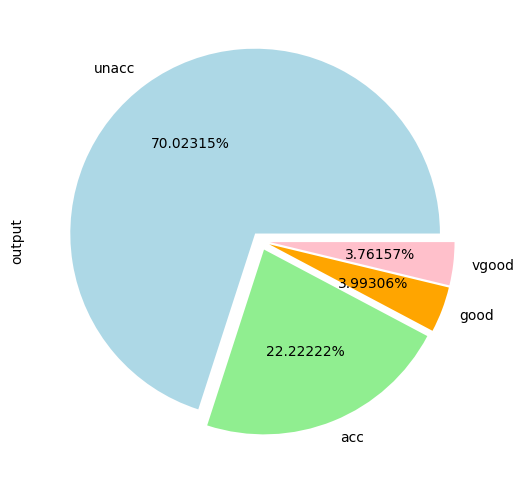

In [11]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
data.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05,0.05))

In [13]:
data.columns

Index(['price', 'maint', 'doors', 'persons', 'lug_capacity', 'satety',
       'output'],
      dtype='object')

In [15]:
columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']


In [20]:
label_encoders = {}
for column in columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [21]:
data

,price,maint,doors,persons,lug_capacity,safety,output
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [22]:
X = data.drop('output', axis=1).values
y = data['output'].values

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((1382, 6), (346, 6), (1382,), (346,))

In [26]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [27]:
X_train

tensor([[-0.4472, -0.4472, -0.4472, -1.2247,  1.2247, -1.2247],
        [-0.4472, -1.3416,  0.4472, -1.2247, -1.2247,  1.2247],
        [ 1.3416, -0.4472, -0.4472,  0.0000,  1.2247,  1.2247],
        ...,
        [-0.4472, -0.4472, -0.4472, -1.2247, -1.2247,  0.0000],
        [-1.3416, -1.3416, -1.3416,  1.2247,  1.2247,  1.2247],
        [-1.3416,  0.4472, -0.4472,  0.0000,  1.2247,  0.0000]])

In [28]:
y_test

tensor([2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2,
        2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 0,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,
        0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 3,
        2, 0, 0, 2, 2, 2, 0, 2, 3, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2,
        2, 2, 3, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
        2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0,
        2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 0, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0,
        2, 2, 3, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 3,
        1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [29]:
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1382, 6]),
 torch.Size([346, 6]),
 torch.Size([1382]),
 torch.Size([346]))

In [36]:
# 모델을 정의

import torch.nn as nn
import torch

class CarEvaluationDense(nn.Module):
    def __init__(self):
        # 부모 클래스의 생성자를 호출하여 초기화
        super(CarEvaluationDense, self).__init__()
        # 첫 번째 전결합 층 정의: 입력 크기 6, 출력 크기 64
        self.fc1 = nn.Linear(6, 64)
        # 두 번째 전결합 층 정의: 입력 크기 64, 출력 크기 32
        self.fc2 = nn.Linear(64, 32)
        # 세 번째 전결합 층 정의: 입력 크기 32, 출력 크기 4 (4개의 클래스)
        self.fc3 = nn.Linear(32, 4)
    
    def forward(self, x):
        # 첫 번째 전결합 층에 ReLU 활성화 함수 적용
        x = torch.relu(self.fc1(x))
        # 두 번째 전결합 층에 ReLU 활성화 함수 적용
        x = torch.relu(self.fc2(x))
        # 세 번째 전결합 층을 통해 출력 (활성화 함수 없음, 원시 로그잇 값 반환)
        x = self.fc3(x)
        return x

# 모델, 손실 함수, 최적화 함수 초기화
model = CarEvaluationDense()

In [37]:
import torch.optim as optim

# 손실 함수 정의: 다중 클래스 분류 문제에 사용되는 교차 엔트로피 손실 함수
criterion = nn.CrossEntropyLoss()

# 최적화 함수 정의: Adam 옵티마이저를 사용하여 학습, 학습률은 0.001로 설정
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [33]:
# 학습 손실과 테스트 정확도를 저장할 변수를 초기화
train_losses = []
test_accuracies = []

# 학습 루프
num_epochs = 20
for epoch in range(num_epochs):
    model.train()  # 모델을 학습 모드로 설정
    running_loss = 0.0
    
    # 훈련 데이터 배치 단위로 반복
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()  # 파라미터 기울기를 초기화

        # 순전파
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # 역전파 및 최적화
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # 에포크 당 평균 손실을 계산하여 저장
    train_losses.append(running_loss / len(train_dataloader))

    # 테스트 데이터 평가
    model.eval()  # 모델을 평가 모드로 설정
    correct = 0
    total = 0
    
    with torch.no_grad():  # 평가 시 기울기 계산 비활성화
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # 정확도 계산 및 저장
    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    # 에포크 별 손실과 정확도 출력
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 1.0319, Accuracy: 69.36%
Epoch 2/20, Loss: 0.7397, Accuracy: 69.08%
Epoch 3/20, Loss: 0.6668, Accuracy: 69.08%
Epoch 4/20, Loss: 0.6046, Accuracy: 69.36%
Epoch 5/20, Loss: 0.5511, Accuracy: 71.97%
Epoch 6/20, Loss: 0.4906, Accuracy: 76.01%
Epoch 7/20, Loss: 0.4532, Accuracy: 79.19%
Epoch 8/20, Loss: 0.4078, Accuracy: 80.92%
Epoch 9/20, Loss: 0.3663, Accuracy: 85.84%
Epoch 10/20, Loss: 0.3401, Accuracy: 87.28%
Epoch 11/20, Loss: 0.3048, Accuracy: 87.57%
Epoch 12/20, Loss: 0.2815, Accuracy: 86.42%
Epoch 13/20, Loss: 0.2627, Accuracy: 88.73%
Epoch 14/20, Loss: 0.2505, Accuracy: 86.71%
Epoch 15/20, Loss: 0.2347, Accuracy: 89.60%
Epoch 16/20, Loss: 0.2264, Accuracy: 90.17%
Epoch 17/20, Loss: 0.2063, Accuracy: 89.88%
Epoch 18/20, Loss: 0.1935, Accuracy: 89.60%
Epoch 19/20, Loss: 0.1813, Accuracy: 89.88%
Epoch 20/20, Loss: 0.1745, Accuracy: 91.04%
Training complete.


In [34]:

# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[ 73   0   4   2]
 [ 14   2   0   1]
 [  8   0 232   0]
 [  2   0   0   8]]
F1 Score: 0.90
Precision: 0.92
Recall: 0.91
Specificity: 0.97


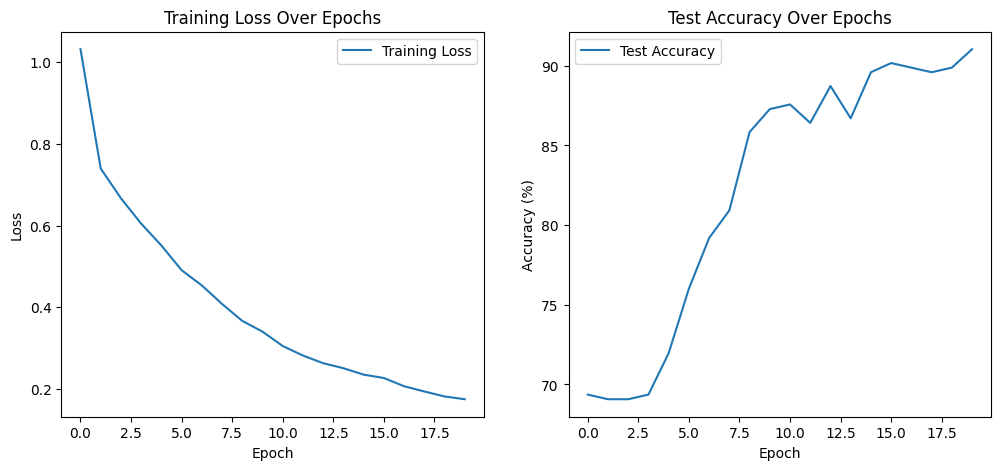

In [35]:

# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()

In [97]:
# 데이터와 타겟 분리
X = data.drop('output', axis=1).values
y = data['output'].values

In [98]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [99]:
data_array = np.hstack((X, y.reshape(-1, 1)))


In [100]:
data_array.shape


(1728, 7)

In [101]:
# Split sequences function
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Apply sequence transformation
n_steps = 5
X, y = split_sequences(data_array, n_steps)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [102]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((1379, 5, 6), (1379,), (345, 5, 6), (345,))

In [103]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [104]:
from torch.utils.data import DataLoader, TensorDataset
import torch

# 예시 데이터가 NumPy 배열이라고 가정, PyTorch 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

# TensorDataset 객체 생성
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# DataLoader 객체 생성
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

/tmp/ipykernel_118/2875005953.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
/tmp/ipykernel_118/2875005953.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.int64)
/tmp/ipykernel_118/2875005953.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
/tmp/ipykernel_118/2875005953.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sou

In [105]:
# Define the 1D CNN model
class CarEvaluationCNN(nn.Module):
    def __init__(self):
        super(CarEvaluationCNN, self).__init__()
        self.conv1 = nn.Conv1d(6, 16, kernel_size=3, padding=1)  # Change input channels to 6
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 5, 64)  # Adjust the linear layer input size accordingly
        self.fc2 = nn.Linear(64, 4)  # 4 classes in the dataset
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [106]:
model = CarEvaluationCNN()


In [107]:
model = model.to('cuda')  # 또는 model.cuda() 사용

In [108]:
# Print the summary of the model
summary(model, input_size=(6, 5))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1                [-1, 16, 5]             304
            Conv1d-2                [-1, 32, 5]           1,568
            Linear-3                   [-1, 64]          10,304
            Linear-4                    [-1, 4]             260
Total params: 12,436
Trainable params: 12,436
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.05
Estimated Total Size (MB): 0.05
----------------------------------------------------------------


In [109]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

In [110]:
# 훈련 에포크 수를 설정합니다.
num_epochs = 20

# 각 에포크마다 반복합니다.
for epoch in range(num_epochs):
    model.train()  # 모델을 훈련 모드로 설정합니다. 이는 일부 레이어(예: 드롭아웃, 배치 정규화)가 훈련 동안에만 활성화되어야 함을 의미합니다.
    running_loss = 0.0  # 현재 에포크의 누적 손실을 추적합니다.

    # 훈련 데이터 로더를 통해 반복합니다.
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)  # 입력 데이터와 레이블을 모델이 있는 같은 장치(CPU/GPU)로 이동합니다.

        optimizer.zero_grad()  # 옵티마이저의 모든 학습 가능한 파라미터의 기울기를 0으로 설정합니다. 이는 새로운 미니배치의 기울기를 정확히 계산하기 위해 필요합니다.

        # 순전파 단계: 모델에 입력을 전달하고 출력을 받습니다.
        inputs = inputs.permute(0, 2, 1)  # 입력 데이터의 차원을 조정합니다 (배치 크기, 채널, 시퀀스 길이).
        outputs = model(inputs)  # 모델을 통해 입력을 전달하여 출력을 받습니다.
        loss = criterion(outputs, labels)  # 출력과 레이블을 비교하여 손실을 계산합니다.

        # 역전파 단계: 손실에 대한 모델의 파라미터의 기울기를 계산합니다.
        loss.backward()
        optimizer.step()  # 옵티마이저를 사용하여 파라미터를 업데이트합니다.

        running_loss += loss.item()  # 현재 미니배치의 손실을 누적 손실에 추가합니다.

    # 현재 에포크에서 평균 손실을 계산합니다.
    train_losses.append(running_loss / len(train_dataloader))

    # 평가 모드로 모델을 설정합니다.
    model.eval()
    correct = 0  # 정확하게 분류된 샘플 수를 추적합니다.
    total = 0  # 전체 샘플 수를 추적합니다.
    all_labels = []  # 테스트 중인 모든 레이블을 저장합니다.
    all_predictions = []  # 모든 예측을 저장합니다.
    
    # 테스트 데이터 로더를 통해 반복하면서 모델을 평가합니다.
    with torch.no_grad():  # 기울기 계산을 비활성화하여 메모리 사용량을 줄이고 계산 속도를 높입니다.
        for inputs, labels in test_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            inputs = inputs.permute(0, 2, 1)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    # 에포크에 대한 정확도를 계산합니다.
    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    # 에포크의 결과를 출력합니다.
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

# 전체 훈련이 완료된 후 메시지를 출력합니다.
print("Training complete.")

Epoch 1/20, Loss: 0.9219, Accuracy: 72.17%
Epoch 2/20, Loss: 0.6385, Accuracy: 75.07%
Epoch 3/20, Loss: 0.4880, Accuracy: 79.13%
Epoch 4/20, Loss: 0.4045, Accuracy: 81.45%
Epoch 5/20, Loss: 0.3254, Accuracy: 84.93%
Epoch 6/20, Loss: 0.2883, Accuracy: 83.48%
Epoch 7/20, Loss: 0.2223, Accuracy: 88.99%
Epoch 8/20, Loss: 0.1981, Accuracy: 91.59%
Epoch 9/20, Loss: 0.1547, Accuracy: 93.04%
Epoch 10/20, Loss: 0.1275, Accuracy: 94.78%
Epoch 11/20, Loss: 0.1080, Accuracy: 96.52%
Epoch 12/20, Loss: 0.0971, Accuracy: 94.78%
Epoch 13/20, Loss: 0.0951, Accuracy: 95.94%
Epoch 14/20, Loss: 0.0747, Accuracy: 97.39%
Epoch 15/20, Loss: 0.0708, Accuracy: 98.26%
Epoch 16/20, Loss: 0.0633, Accuracy: 97.68%
Epoch 17/20, Loss: 0.0599, Accuracy: 97.68%
Epoch 18/20, Loss: 0.0444, Accuracy: 98.26%
Epoch 19/20, Loss: 0.0443, Accuracy: 98.55%
Epoch 20/20, Loss: 0.0374, Accuracy: 98.55%
Training complete.


Confusion Matrix:
[[ 58   2   2   0]
 [  0  15   0   0]
 [  1   0 248   0]
 [  0   0   0  19]]
F1 Score: 0.99
Precision: 0.99
Recall: 0.99
Specificity: 0.99


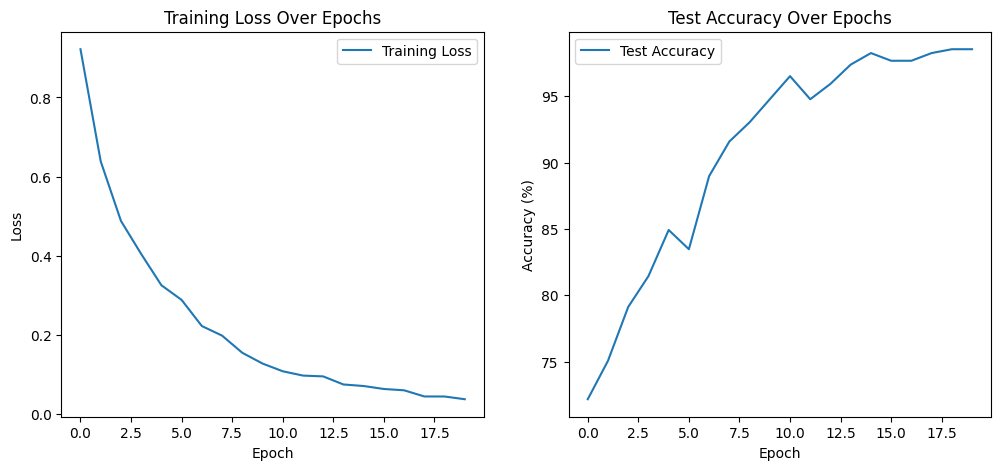

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# 리스트를 NumPy 배열로 변환
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# 성능 지표 계산
conf_matrix = confusion_matrix(all_labels, all_predictions)  # 혼동 행렬 계산
f1 = f1_score(all_labels, all_predictions, average='weighted')  # F1 점수 계산
precision = precision_score(all_labels, all_predictions, average='weighted')  # 정밀도 계산
recall = recall_score(all_labels, all_predictions, average='weighted')  # 재현율 계산

# 각 클래스에 대한 특이도 계산
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])  # 참 음성 계산
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]  # 거짓 양성 계산
    specificity.append(tn / (tn + fp))  # 특이도 계산

# 성능 지표 출력
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

# 손실 및 정확도 그래프 플로팅
plt.figure(figsize=(12, 5))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()  # 그래프 표시